# Hypothèses

# Echelle de temps

In [51]:
%matplotlib inline     
# ^Sans animations
# %matplotlib notebook 
# ^Avec animations
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import math
import random
from random import uniform
import pandas as pd
from scipy import stats
import pylab

import imageio

import statistics
# Use: statistics.mean(liste)
 
from statistics import mean
# Use: mean(liste)

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

On considère les 2 pays suivants, qui ont des conditions climatiques très différentes l'un de l'autre.

## Si on veut voir l'évolution de la température sur une année mois par mois

On veut parcourir et récupérer les données du fichiers pour en faire la moyenne. Pour cela, on décide de prendre 730 heures par mois, compte tenu du fichier .txt qui nous est fourni. 


On ouvre le fichier et on le lit au fur et à mesure. on somme chaque donnée et lorsqu'on atteint 730 heures on stocke 
la valeur dans le dictionnaire et on remet le compteur des heures à 0, puis on refait la même.

10 valeurs ne seront pas prises en compte mais le rapport 10/8770 est négligeable.


In [2]:
temp_months = {"Algérie":[], "France":[]}

In [3]:
# Nous créons 2 listes vides dans lesquelles nous allons les remplir avec toutes les données du fichier .txt
    
    # cas de l'Algérie
    
temp_Alg = []

with open("Donnees/temperatures_algeria_1.txt","r") as algerie_1:
    line = algerie_1.readline()
    while line != "":
        data = float(line)
        temp_Alg.append(data)
        line = algerie_1.readline()

# cas de la France

temp_Fr = []

with open("Donnees/temperatures_france_1.txt","r") as france_1:
    
    line = france_1.readline()
    while line != "":
        data = float(line)
        temp_Fr.append(data)
        line = france_1.readline()

# A DEMANDER : DIFFERENCE ENTRE VERSION 1 ET VERSION 2 DES FICHIERS .TXT

In [4]:
print(len(temp_Fr))

8770


In [5]:
def separate_months(L , country):
    """ list[float] * str -> list[float]
        on a en paramètres la liste de témpératures par heure sur un an. on veut retourner une liste de 12 éléments,
        c'est à dire une température moyenne par mois. """
    
    # A FAIRE : TESTER SI COUNTRY EST BIEN DANS LA LISTE
    
    sum_month = 0.0 
    hour = 1
    
    # on parcourt la liste (temp_pays_y). dès que l'on a atteint le nombre d'heures correspondant à 1 mois (730), 
    #on ajoute leur moyenne (average_temp) au dictionnaire associé au bon pays.
    
    for data in L:
        sum_month += data 
        if hour == 730:
            average_temp = sum_month/(24*30)
            temp_months[country].append(average_temp)
            average_temp = 0
            hour = 0
            sum_month = 0
        hour += 1
    
    return temp_months[country]

In [6]:
separate_months(temp_Fr,"France")

[4.075452479881546,
 5.094740086829668,
 5.931823458730066,
 9.759466537208441,
 14.168751367723118,
 17.40443319460811,
 19.990014972178805,
 20.81498008854977,
 19.182814093683977,
 11.063233694802598,
 6.805937653357354,
 2.4451400563507]

In [7]:
#vérification que le dictionnaire se remplit

for key,value in temp_months.items():
        print (key, value)

Algérie []
France [4.075452479881546, 5.094740086829668, 5.931823458730066, 9.759466537208441, 14.168751367723118, 17.40443319460811, 19.990014972178805, 20.81498008854977, 19.182814093683977, 11.063233694802598, 6.805937653357354, 2.4451400563507]


In [8]:
separate_months(temp_Alg,"Algérie")

[11.331315331240026,
 15.529697039093621,
 18.48782432280635,
 28.417245578492494,
 32.000702458225085,
 35.95744586659401,
 36.898201330739354,
 35.700030893676676,
 33.62270933922441,
 28.100242246043557,
 17.909585183647792,
 11.431978669138479]

In [9]:
#vérification que le dictionnaire est entièrement rempli

for key,value in temp_months.items():
        print (key, value)
        
print('\ntaille fr :',len(temp_months["France"]))
print('taille alg :',len(temp_months["Algérie"]))

Algérie [11.331315331240026, 15.529697039093621, 18.48782432280635, 28.417245578492494, 32.000702458225085, 35.95744586659401, 36.898201330739354, 35.700030893676676, 33.62270933922441, 28.100242246043557, 17.909585183647792, 11.431978669138479]
France [4.075452479881546, 5.094740086829668, 5.931823458730066, 9.759466537208441, 14.168751367723118, 17.40443319460811, 19.990014972178805, 20.81498008854977, 19.182814093683977, 11.063233694802598, 6.805937653357354, 2.4451400563507]

taille fr : 12
taille alg : 12


## Si on veut voir l'évolution de la température sur une année jour par jour

In [10]:
temp_days = {"Algérie":[] , "France":[]}

In [11]:
def separate_days(L , country):
    """ list[float] * str -> list[float]
        on a en paramètres la liste de témpératures par heure sur un an. on veut retourner une liste de 365 éléments,
        c'est à dire une température moyenne par jour. """

    #on parcourt la liste. dès que l'on a atteint le nombre d'heures correspondant à 1 jour, on ajoute leur moyenne
    #au dictionnaire associé au bon pays
    
    sum_day = 0.0 
    hour = 1
    
    

    for data in L:
            sum_day += data 
            if hour == 24:
                average_temp = sum_day/24
                temp_days[country].append(average_temp)
                average_temp = 0
                hour = 0
                sum_day = 0
            hour += 1
            
    return temp_days[country]

In [12]:
separate_days(temp_Fr,"France")

[4.762211668325331,
 7.930965967687584,
 6.30014802470176,
 6.201723995875011,
 5.610814387163903,
 5.648880611184151,
 6.141183473193206,
 4.525835643649207,
 6.086124486770316,
 5.9097408311501,
 5.6007649040225616,
 5.233806504467374,
 4.039197035774362,
 1.9037123212177012,
 1.6561905061484434,
 0.969049483114155,
 -1.1097317841419496,
 -2.844150762421279,
 -1.5610449361260024,
 -1.9289778310161079,
 -2.1779613890877365,
 0.43258980124161184,
 4.443734411682333,
 4.096753166492978,
 6.165728574441459,
 7.444266453854314,
 9.314566625396324,
 7.50334523353374,
 4.71957749742266,
 6.889047736784593,
 8.07196326145859,
 10.373538524660397,
 9.024897887091852,
 5.003581981592919,
 5.177590304834271,
 8.708247809201824,
 8.632176267119759,
 7.974574633925184,
 8.0195232312483,
 6.429512280412166,
 4.063742137022615,
 3.257164529502402,
 1.9633392545230162,
 5.4054394953298655,
 5.2299085231277,
 2.617103812336353,
 0.20388792732796426,
 1.0618092578066982,
 2.4023494029037287,
 3.095946

In [13]:
separate_days(temp_Alg,"Algérie")

[9.158586465850965,
 9.41299065422308,
 9.766732460798432,
 12.560915115801452,
 13.537481253306487,
 14.645421543150206,
 9.774041175810325,
 11.741242727218276,
 14.149098887884614,
 14.850187375399921,
 14.068093963169517,
 13.582247132754299,
 12.07671274626391,
 13.049015466678675,
 11.552677879911577,
 11.480017071501722,
 6.626116714231938,
 5.161632943724989,
 6.9864972702764305,
 9.534985288963162,
 10.91383528191418,
 11.81798423484309,
 10.850066743435463,
 10.415624541937175,
 10.454421637458617,
 9.52042876489783,
 10.366838869232822,
 12.113073603448044,
 12.59148990693452,
 14.45295871450383,
 13.378455795839505,
 13.839513901172737,
 14.547180232198746,
 16.12360915430445,
 13.152921031764341,
 13.560260081760205,
 11.743557153638706,
 12.01330964353579,
 13.362802964522379,
 11.509678273258308,
 15.008908303074742,
 17.030133439612232,
 18.005298740073314,
 18.602055320793927,
 19.815241106808823,
 15.777663310408435,
 12.187074342943417,
 10.55211479478418,
 12.180983

In [14]:
#vérification que le dictionnaire se remplit

print('taille fr :',len(temp_days["France"]))
print('taille alg :',len(temp_days["Algérie"]))

taille fr : 365
taille alg : 365


## Si on veut voir l'évolution heure par heure sur une journée : NON FINI

In [15]:
temp_hours = {"Algérie":[] , "France":[]}

def pick_a_day(L, country , month, day):
    ''' liste[float] * str * int * int -> list[float]
        on a en paramètres la liste de témpératures par heure sur un an. on veut retourner une liste de 24 éléments,
        c'est à dire la liste de départ tronquée.'''
    
    # vérifications de la validité des paramètres
    
    if (day < 1) or (day > 30):
        print("Le jour n'est pas dans le bon intervalle\n")
        return 
    
    #  A FAIRE : VERIFIER QUE COUNTRY EST BIEN DANS LE DICO
    
    if (month < 1) or (month > 12):
        print("Le mois n'est pas dans le bon intervalle\n")
        return
    
    index_mois = 0 #compteur de mois
    index_jour = 0 #compteur de jour 
    index = 0 #indice de liste 
    liste = np.zeros(24) #liste de sauvegarde 
    
    for i in range(1,8771): #ici i parcourt les lignes du fichier source 
        
        if (i%(30*24) == 0): # 1 ligne = 1 heure, donc on vérifie si on a atteint un mois (1 mois = 720 lignes)
            index_mois = index_mois + 1 #si c'est le cas on incrémente index_mois
            
        if(index_mois == month): # si on tombe sur le mois qu'on cherche 
            for j in range(i-719,i+1): #on parcourt ce mois 
                
                liste[index] =  L[j-1] # on sauvegarde les heures de chaque jour de ce mois dans liste 
                
                if(index+1 == 24): #on vérifie si on a atteint une journée (1 journée = 24 lignes)
                    index_jour = index_jour + 1 #si c'est le cas on incrémente 
                    
                if(index_jour == day): #si on tombe sur le jour qu'on cherche on retourne la liste 
                    return liste
                
                elif(index+1 == 24): #si c'est pas le cas, alors index devient nul pour qu'on puisse remplir à nouveau liste 
                    index = 0
                    
                index = index + 1 #on incrémente liste 
    
    for j in range(i-719,i+1): #cette boucle for est pour le dernier mois donc décembre car il n'est pas pris en charge par la boucle d'avant 
                
        #meme logique qu'auparavant
        
        liste[index] = L[j-1]
        
        if(index+1 == 24):
            index_jour = index_jour + 1

        if(index_jour == day):
            return liste

        elif(index+1 == 24):
            index = 0
            
        index = index + 1

In [16]:
temp_hours["France"] = pick_a_day(temp_Fr,"France",12,30).copy()

print(temp_hours["France"])

[5.79743024 6.16140425 5.70826392 5.37937175 5.17472772 5.10894929
 5.37644826 5.77842758 6.25641755 6.71394311 7.16269821 7.58368019
 7.84533219 8.00466218 8.31893692 8.53966012 8.73407194 9.00303265
 9.0965842  9.27053162 8.49873131 7.55736882 6.68909348 6.35143084]


In [17]:
temp_hours["Algérie"] = pick_a_day(temp_Alg,"Algérie",12,30).copy()

In [18]:
print('taille alg :' ,len(temp_Alg))
print('taille fr :', len(temp_Fr))


taille alg : 8770
taille fr : 8770


In [19]:
pick_a_day(temp_Fr,"France",1,1)

array([3.39432475, 3.21014513, 2.91779653, 2.57428692, 2.12407008,
       1.64608012, 1.38588986, 1.18416933, 1.65338883, 3.59019831,
       5.04317085, 6.47421725, 7.30448728, 7.93449851, 7.97396557,
       7.69038743, 7.17146867, 6.43767368, 5.99915078, 5.93921932,
       5.76819538, 5.65710292, 5.63371503, 5.58547751])

In [20]:
pick_a_day(temp_Fr,"Algérie",1,1)

array([3.39432475, 3.21014513, 2.91779653, 2.57428692, 2.12407008,
       1.64608012, 1.38588986, 1.18416933, 1.65338883, 3.59019831,
       5.04317085, 6.47421725, 7.30448728, 7.93449851, 7.97396557,
       7.69038743, 7.17146867, 6.43767368, 5.99915078, 5.93921932,
       5.76819538, 5.65710292, 5.63371503, 5.58547751])

In [21]:
print('taille fr :',len(temp_hours["France"]))
print('taille alg :',len(temp_hours["Algérie"]))

taille fr : 24
taille alg : 24


In [22]:
import numpy as np
from matplotlib.pyplot import *
from scipy.sparse import diags  # Pour les matrices diagonales

# REMARQUE : éviter d'appeler une variable ou une fonction "lambda" car déjà prédéfini par python

# CE QUI SUIT EST UNE BASE POUR IMPLEMENTER LES FONCTIONS DES DEUX METHODES

# La fonction suivante permet de discrétiser un intervalle [0,1] en N+1 noeuds équidistants
# (c'est-à-dire on "tranche" notre colonne de terre en N+1 morceaux)

def intervalle_discret(profondeur,N): # Pour commencer on peut prendre par exemple N=10
    x=np.linspace(0,profondeur,N+1)
    return x

# La fonction suivante permet de calculer le delta_x à partir de l'intervalle discrétisé par la fonction ci-dessus
def calcul_delta_x(intervalle_discret):
    return intervalle_discret[1]-intervalle_discret[0]

# La fonction suivante permet de calculer la constante alpha de l'équation différentielle 
# On détermine alpha grâce aux valeurs de la conductivité thermique du sol et à sa capacité thermique volumique
# ATTENTION: il faut bien utiliser les unités SI

def calcul_alpha(lambda_conductivite_thermique_sol,capacite_thermique_volumique_sol):
    alpha=lambda_conductivite_thermique_sol/capacite_thermique_volumique_sol
    return alpha

# La fonction suivante permet de calculer la valeur de lambda qui servira dans le calcul des températures de la colonne au cours du temps

def calcul_lambda(alpha,delta_x,delta_t):
    lamb=alpha*delta_t/((delta_x)**2)
    return lamb

# La fonction suivante permet d'initialiser les températures de notre colonne de terre à l'instant t=0 dans un vecteur colonne de dimensions N-1 (et pas N attention)
# Il s'agit d'un choix arbitraire étant donné que les valeurs vont toujours finir par converger vers les températures à l'équilibre thermodynamique de la colonne de terre 
# On choisit ici d'initialiser notre colonne avec un température uniforme qui vaut 0
# ATTENTION: dans le programme qui étudiera la température sur plusieurs heures, il ne faudra pas réinitialiser à 0 à chaque nouvelle heure mais seulement au début de la première
def initialisation_zeros(N):
    T=np.zeros((N-1,1)) # création d'un vecteur colonne avec que des zéros
    return T
    
# La fonction suivante permet de créer le vecteur qui sera utilisé pour calculer le vecteur T à l'étape k+1
# Il n'y a pas vraiment de nom pertinent pour cette fonction
# extremite fait référence aux températures aux extrémités de la colonne de terre (car elles interviennent uniquement dans ce vecteur)

def extremite(N,lamb,Tg,Td):
    ext=np.zeros((N-1,1))
    ext[0]=lamb*Tg
    ext[-1]=lamb*Td
    
    return ext


# On passe maintenant aux fonctions spécifiques à chaque méthode
# "e" correspond à explicite et "i" à implicite 

# METHODE EXPLICITE

# La fonction suivante permet de créer la matrice diagonale de taille (N-1)*(N-1)
# Cette matrice sera utilisée pour calculer le vecteur T à l'étape k+1 avec la méthode explicite
# ATENTION : la matrice diagonale est différente pour la méthode implicite

def matrice_diag_e(N,lamb):
    k = np.array([lamb*np.ones(N-2),1-2*lamb*np.ones(N-1),lamb*np.ones(N-2)])
    offset = [-1,0,1]
    A = diags(k,offset).toarray()
    return A

# La fonction suivante est l'implémentation de la méthode explicite
# Cette fonction reprend d'autres fonctions vues plus haut
# Elle retourne par ailleurs le vecteur colonne T au bout d'un certain temps donné par n*delta_t
# Chaque étape (soit chaque boucle) correspond à un avancement de delta_t dans le temps
# Plus on fait de boucles, plus on se rappoche de la valeur théorique des températures à l'équilibre thermodynamique dans la colonne
# En effet, on atteint à un certain moment des températures constantes dans la colonne de terre qar on a atteint l'équilibre
# Pour rappel on considère que l'on s'intéresse à une colonne de terre dont la température est initialement nulle et dont on applique une certaine température au niveau du sol et au niveau de la dernière couche de sol)
# Ainsi, pour plus de logique, on suppose que la température imposée sur la dernière couche du sol est égale à la température initiale de la colonne
# (cela semblerait étrange d'imposer une température dans le sol à la colonne de terre)


def methode_explicite(profondeur,N,Tg,Td,T_initial,lambda_conductivite_thermique_sol,capacite_thermique_volumique_sol,delta_t,n):
    
    x=intervalle_discret(profondeur,N)
    delta_x=calcul_delta_x(x)
    alpha=calcul_alpha(lambda_conductivite_thermique_sol,capacite_thermique_volumique_sol)
    lamb=calcul_lambda(alpha,delta_x,delta_t)
    
    ext=extremite(N,lamb,Tg,Td)
    
    A=matrice_diag_e(N,lamb)
    T=T_initial
    
    for i in range(1,n+1):
        T=A.dot(T)+ext
        
    return T


# METHODE IMPLICITE

# La fonction suivante permet de créer la matrice diagonale de taille (N-1)*(N-1)
# Cette matrice sera utilisée pour calculer le vecteur T à l'étape k+1 avec la méthode implicite
# ATENTION : cette matrice diagonale est différente pour la méthode explicite

def matrice_diag_i(N,lamb):
    k = np.array([-lamb*np.ones(N-2),1+2*lamb*np.ones(N-1),-lamb*np.ones(N-2)])
    offset = [-1,0,1]
    A = diags(k,offset).toarray()
    return A

# La fonction suivante est l'implémentation de la méthode explicite
# Cette fonction reprend d'autres fonctions vues plus haut
# Elle retourne par ailleurs le vecteur colonne T au bout d'un certain temps donné par n*delta_t
# [Explications cf méthode explicite]

def methode_implicite(profondeur,N,Tg,Td,T_initial,lambda_conductivite_thermique_sol,capacite_thermique_volumique_sol,delta_t,n):
    
    x=intervalle_discret(profondeur,N)
    delta_x=calcul_delta_x(x)
    alpha=calcul_alpha(lambda_conductivite_thermique_sol,capacite_thermique_volumique_sol)
    lamb=calcul_lambda(alpha,delta_x,delta_t)
    
    ext=extremite(N,lamb,Tg,Td)
    
    A=matrice_diag_i(N,lamb)
    T=T_initial
    
    for i in range(1,n+1):
        T= np.linalg.solve(A,T+ext)
    return T


In [23]:
# VALEURS DE BASE (peuvent être modifiées par la suite /!\ à toujours vérifier)

profondeur=5
N=100

liste_t=temp_months["France"]
Tg=liste_t[0]


Td=11.994855138130776
#T_initial=np.ones((N-1,1))
T_initial=initialisation_zeros(N) #création vecteur nul de taille N-1


lambda_conductivite_thermique_sol=2.1
capacite_thermique_volumique_sol=1674*10**3

#delta_x=0.1   
delta_t=360    

n=100000


T=methode_explicite(profondeur,N,Tg,Td,T_initial,lambda_conductivite_thermique_sol,capacite_thermique_volumique_sol,delta_t,n)




In [24]:
# Méthode explicite (e)

def evolution_mois_e(liste_t,profondeur,N,Td,lambda_conductivite_thermique_sol,capacite_thermique_volumique_sol):
    taille=len(liste_t)
    
    T_initial=initialisation_zeros(N)
    
    # On adapte delta_t et n en fonction de l'échelle étudiée (heure, jour,mois, année, ...)
    delta_t=1
    n=100000
    # n est grand car on cherche à se rapprocher le plus possible de la valeur à l'équilibre thermodynamique (sans faire planter l'ordinateur)
    
    # On initialise le tableau à 2D (soit une matrice) qui va accueillir les données en fonction de la profondeur et du temps
    # En effet, chaque colonne correspond aux températures à une certaine profondeur à un instant donné t 
    # La colonne suivante correspondra aux mêmes profondeurs mais à des températures différentes (car considérées à un instant t plus tard)
    T_courbes=[]
    
    # Le nombre de boucles correspond au nombre de relevés de température disponibles dans la liste entrée en paramètre
    for i in range(taille): # A chaque boucle on calcule le vecteur colonne associée à la température de la i-ème case de la liste passée en paramètre
        
        # On pose Tg grâce aux valeurs fournies par la liste en paramètre
        Tg=liste_t[i]
        
        # On calcule notre vecteur colonne
        T_e=methode_explicite(profondeur,N,Tg,Td,T_initial,lambda_conductivite_thermique_sol,capacite_thermique_volumique_sol,delta_t,n)
        
        # On réinitiliase T (pas nécessaire car on cherche à atteindre les valeurs à l'équilibre et celles-ci ne dépendent pas des valeurs initiales)
        T_initial=T_e
        
        #On ajoute T_e à la "matrice" T_courbes, qui regroupe tous les vecteurs colonnes
        T_courbes.append(T_e)
        
    return T_courbes


def evolution_annee_e(liste_t,profondeur,N,Td,lambda_conductivite_thermique_sol,capacite_thermique_volumique_sol):
    taille=len(liste_t)
    
    T_initial=initialisation_zeros(N)
    delta_t=1
    n=100000
    
    T_courbes=[]
    
    for i in range(taille):
        Tg=liste_t[i]
        T_e=methode_explicite(profondeur,N,Tg,Td,T_initial,lambda_conductivite_thermique_sol,capacite_thermique_volumique_sol,delta_t,n)
        T_initial=T_e
        T_courbes.append(T_e)
        
    return T_courbes


        
def evolution_jour_e(liste_t,profondeur,N,Td,lambda_conductivite_thermique_sol,capacite_thermique_volumique_sol):
    taille=len(liste_t)
    
    T_initial=initialisation_zeros(N)
    delta_t=1
    n=3600
    
    T_courbes=[]
    
    for i in range(taille):
        Tg=liste_t[i]
        T_e=methode_explicite(profondeur,N,Tg,Td,T_initial,lambda_conductivite_thermique_sol,capacite_thermique_volumique_sol,delta_t,n)
        T_initial=T_e
        T_courbes.append(T_e)
        
    return T_courbes

def evolution_jour_e_bis(liste_t,profondeur,N,Td,lambda_conductivite_thermique_sol,capacite_thermique_volumique_sol):
    taille=len(liste_t)
    
    T_initial=Td*np.ones((N-1,1))
    #delta_t=0.1
    delta_t=10
    n=36000
    
    T_courbes=[]
    
    for i in range(taille):
        Tg=liste_t[i]
        T_e=methode_explicite(profondeur,N,Tg,Td,T_initial,lambda_conductivite_thermique_sol,capacite_thermique_volumique_sol,delta_t,n)
        T_initial=T_e
        T_courbes.append(T_e)
        
    return T_courbes


In [25]:
# Méthode imlicite (i)
# Quasiment aucune différence avec la case ci-dessus si ce n'est qu'on utilise les fonctions pour la méthode implicite (à la place de explicite)

def evolution_mois_i(liste_t,profondeur,N,Td,lambda_conductivite_thermique_sol,capacite_thermique_volumique_sol):
    taille=len(liste_t)
    
    T_initial=initialisation_zeros(N)
    
    # On adapte delta_t et n en fonction de l'échelle étudiée (heure, jour,mois, année, ...)
    delta_t=1
    n=100000
    # n est grand car on cherche à se rapprocher le plus possible de la valeur à l'équilibre thermodynamique (sans faire planter l'ordinateur)
    
    # On initialise le tableau à 2D (soit une matrice) qui va accueillir les données en fonction de la profondeur et du temps
    # En effet, chaque colonne correspond aux températures à une certaine profondeur à un instant donné t 
    # La colonne suivante correspondra aux mêmes profondeurs mais à des températures différentes (car considérées à un instant t plus tard)
    T_courbes=[]
    
    # Le nombre de boucles correspond au nombre de relevés de température disponibles dans la liste entrée en paramètre
    for i in range(taille): # A chaque boucle on calcule le vecteur colonne associée à la température de la i-ème case de la liste passée en paramètre
        
        # On pose Tg grâce aux valeurs fournies par la liste en paramètre
        Tg=liste_t[i]
        
        # On calcule notre vecteur colonne
        T_e=methode_implicite(profondeur,N,Tg,Td,T_initial,lambda_conductivite_thermique_sol,capacite_thermique_volumique_sol,delta_t,n)
        
        # On réinitiliase T (pas nécessaire car on cherche à atteindre les valeurs à l'équilibre et celles-ci ne dépendent pas des valeurs initiales)
        T_initial=T_e
        
        #On ajoute T_e à la "matrice" T_courbes, qui regroupe tous les vecteurs colonnes
        T_courbes.append(T_e)
        
    return T_courbes


def evolution_annee_i(liste_t,profondeur,N,Td,lambda_conductivite_thermique_sol,capacite_thermique_volumique_sol):
    taille=len(liste_t)
    
    T_initial=initialisation_zeros(N)
    delta_t=1
    n=100000
    
    T_courbes=[]
    
    for i in range(taille):
        Tg=liste_t[i]
        T_e=methode_implicite(profondeur,N,Tg,Td,T_initial,lambda_conductivite_thermique_sol,capacite_thermique_volumique_sol,delta_t,n)
        T_initial=T_e
        T_courbes.append(T_e)
        
    return T_courbes


        
def evolution_jour_i(liste_t,profondeur,N,Td,lambda_conductivite_thermique_sol,capacite_thermique_volumique_sol):
    taille=len(liste_t)
    
    T_initial=initialisation_zeros(N)
    delta_t=1
    n=3600
    
    T_courbes=[]
    
    for i in range(taille):
        Tg=liste_t[i]
        T_e=methode_implicite(profondeur,N,Tg,Td,T_initial,lambda_conductivite_thermique_sol,capacite_thermique_volumique_sol,delta_t,n)
        T_initial=T_e
        T_courbes.append(T_e)
        
    return T_courbes


In [26]:
# VALEURS DE BASE (peuvent être modifiées par la suite /!\ à toujours vérifier)

profondeur=1
N=10

Tg=10 
Td=0 
T_initial=initialisation_zeros(N) #création vecteur nul de taille N


lambda_conductivite_thermique_sol=2.1
capacite_thermique_volumique_sol=1674*10**3

#delta_x=0.1   
delta_t=10    

n=100000

In [27]:
#temp_months c'est mois par mois
#temp_days c'est jour par jour
#temp_hours c'est heure par heure


In [40]:
# GIF METHODE EXPLICITE AFFICHAGE DES 24H UNE PAR UNE (AVEC COULEURS)

N=500 #on augmente la valeur pour avoir une ligne continue et pas que des boules

liste_t=temp_hours["Algérie"] #dictionnaire de Catherine == données des températures au niveau du sol en fonction des mois
x=intervalle_discret(profondeur,N)



#N=500
Td=mean(liste_t) #moyenne de la liste
#print(Td)

profondeur=5
T=evolution_jour_e_bis(liste_t,profondeur,N,Td,lambda_conductivite_thermique_sol,capacite_thermique_volumique_sol)

#print(T)



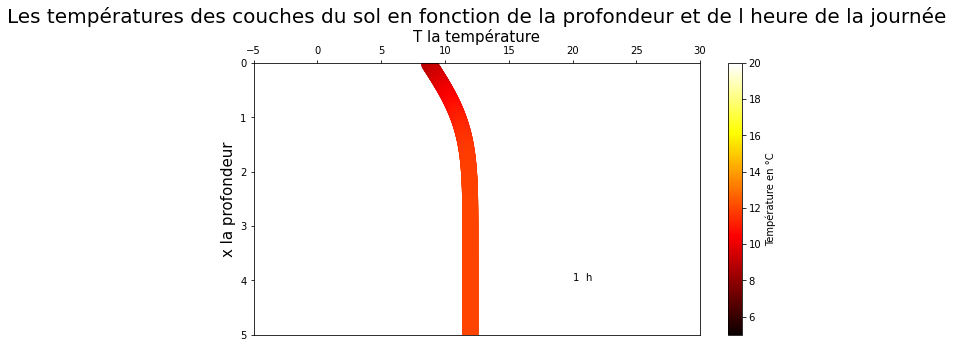

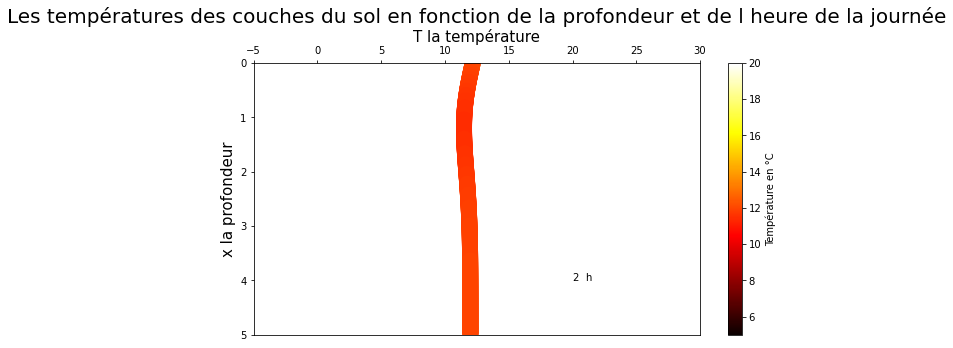

In [69]:
# A NE PAS MODIFIER C'EST L'ORIGINAL ET LE BON

def plot_for_offset(T,profondeur,N,i):
    
    x=intervalle_discret(profondeur,N)
    Y=x[1:-1]
    fig, axes = plt.subplots(figsize=(10,5))
    #axes.plot(T,x[1:-1])
    #axes.grid()
    
    # IMPORTANT ANIMATION CODE HERE
    # Used to keep the limits constant
    axes.set_ylim(0, profondeur)
    #axes.set_xlim(0,20)
    axes.set_xlim(-5,30)
    
    # Paramètres de la courbe
    
    vmin = 5
    vmax = 20

    
    
    plt.scatter(T, Y, c=T, cmap='hot',vmin=vmin,vmax=vmax,linewidth=10)

    plt.text(20,4,i+1)
    plt.text(21,4,'h')


    axes = plt.gca()
    axes.xaxis.set_ticks_position('top')
    axes.yaxis.set_ticks_position('left')
    axes.invert_yaxis()
    axes.xaxis.set_label_position('top')

    plt.xlabel('T la température', fontsize=15)
    plt.ylabel('x la profondeur', fontsize=15)

    plt.title('Les températures des couches du sol en fonction de la profondeur et de l heure de la journée', fontsize=20)
    
    
    cb = plt.colorbar()
    cb.set_label('Température en °C')

    plt.show()


    # Used to return the plot as an image rray
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image

kwargs_write = {'fps':2, 'quantizer':'nq'}
imageio.mimsave('./test.gif', [plot_for_offset(T[i],profondeur,N,i) for i in range(2)], fps=2)

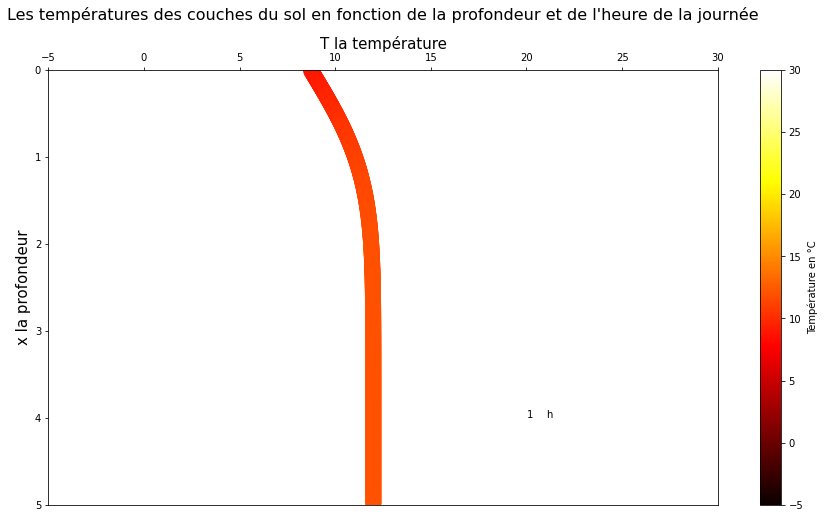

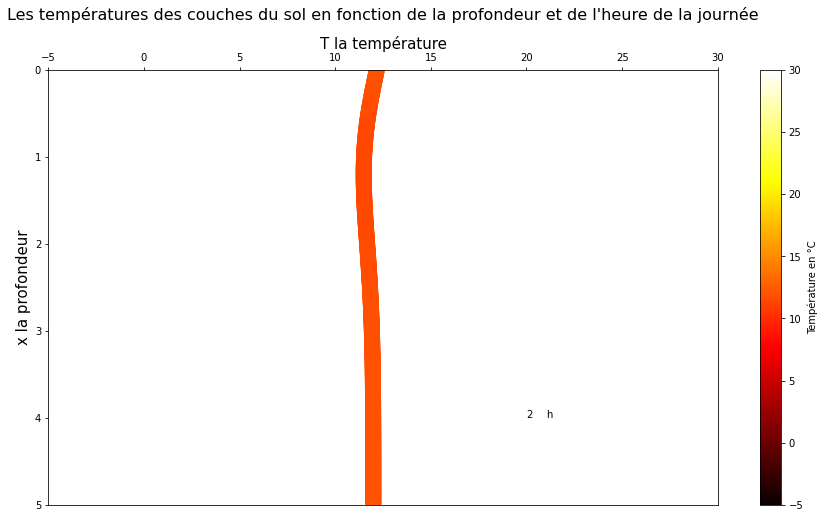

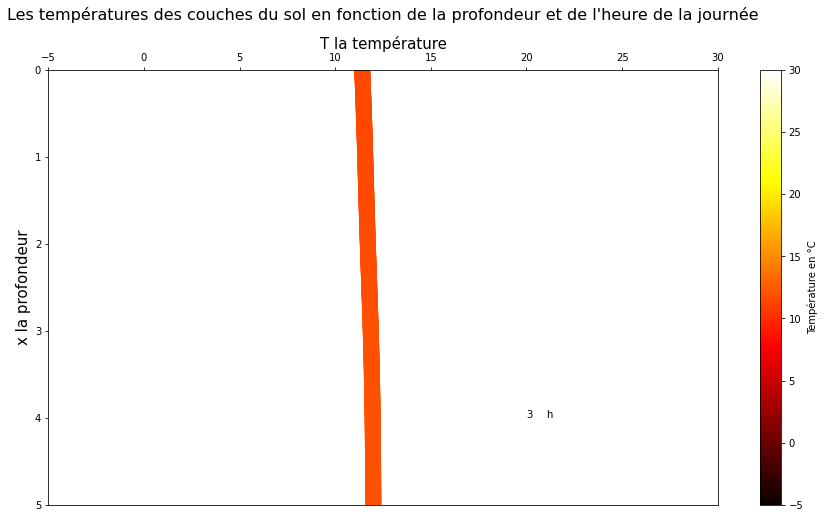

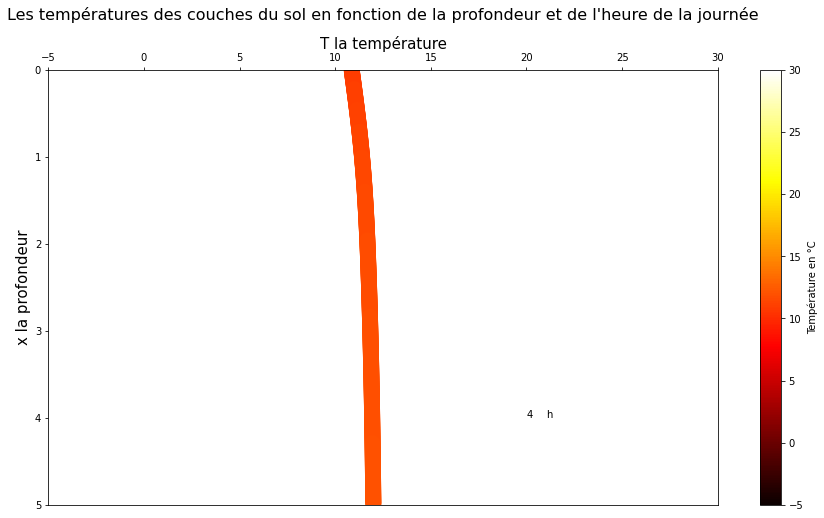

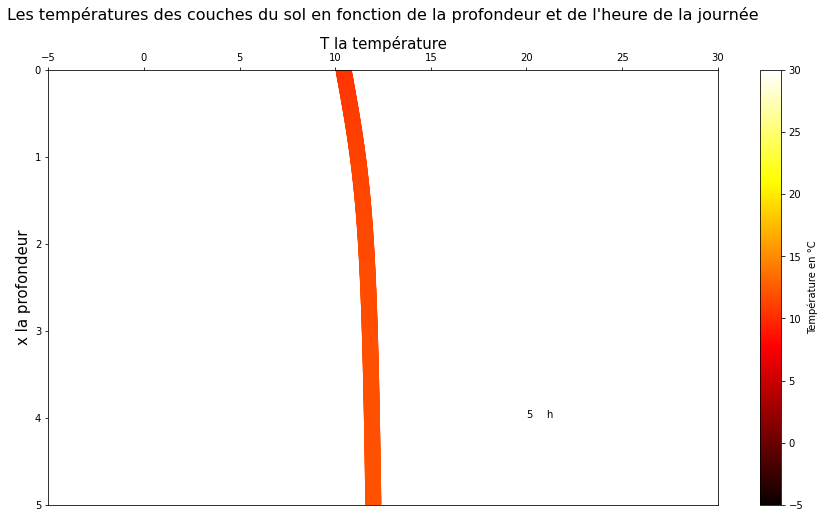

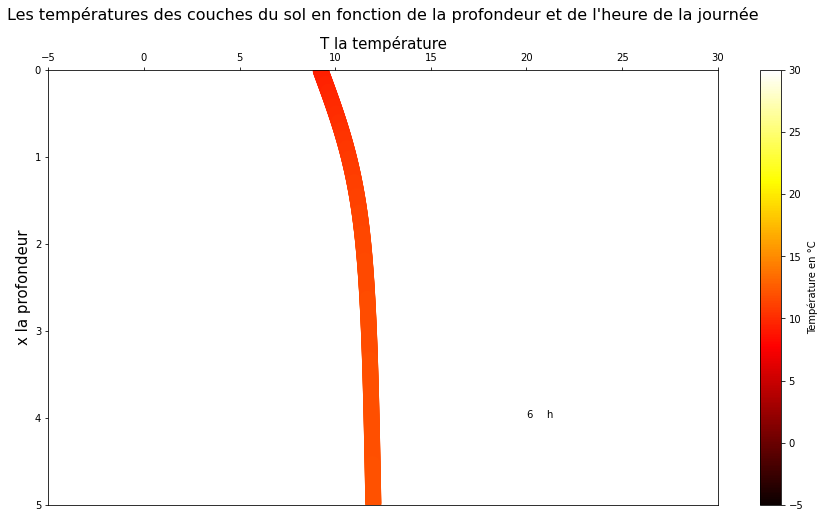

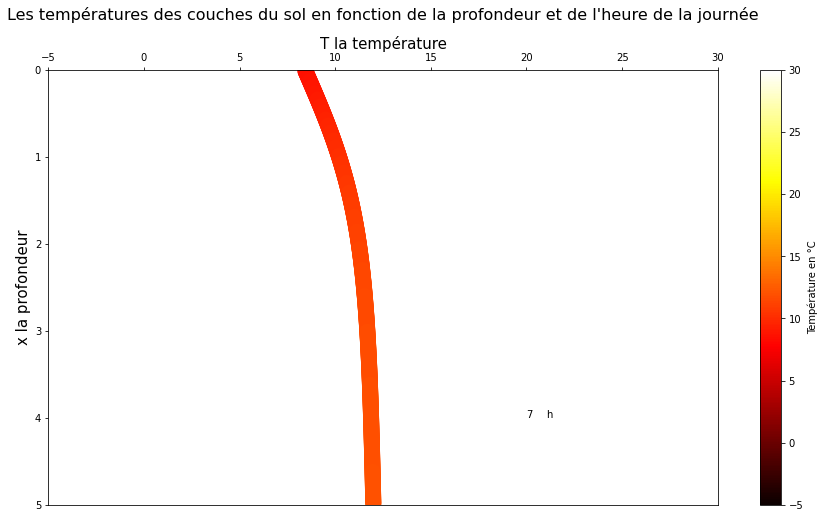

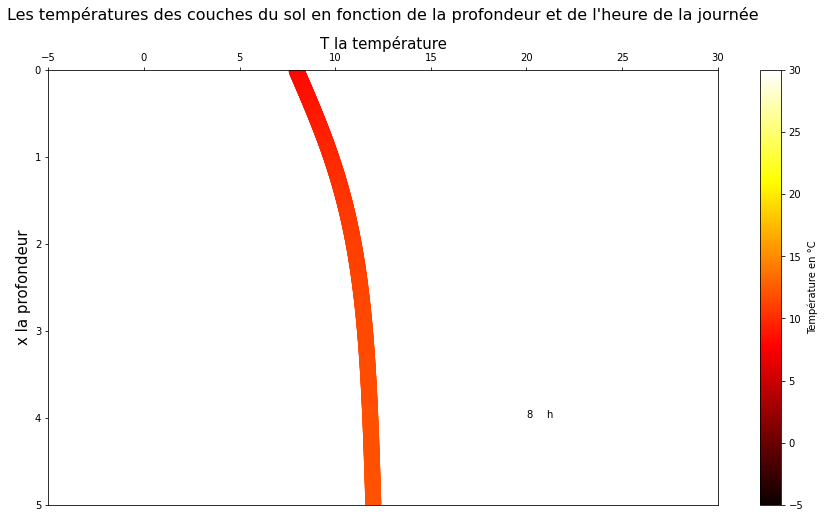

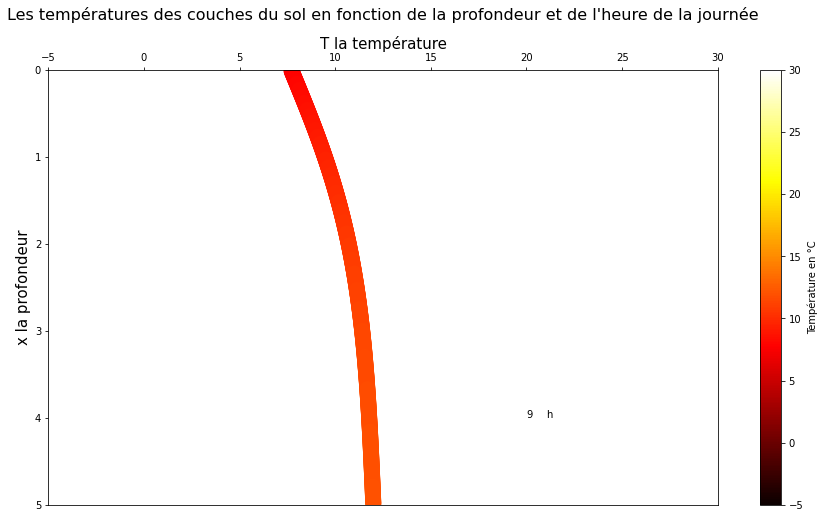

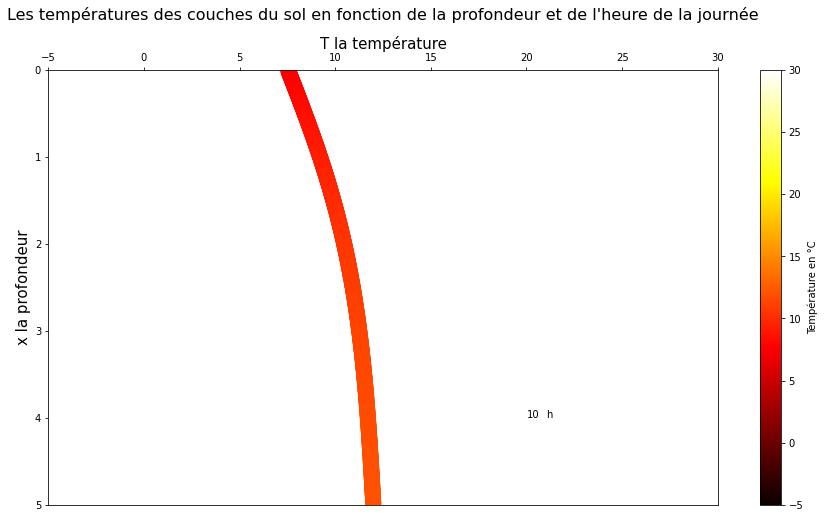

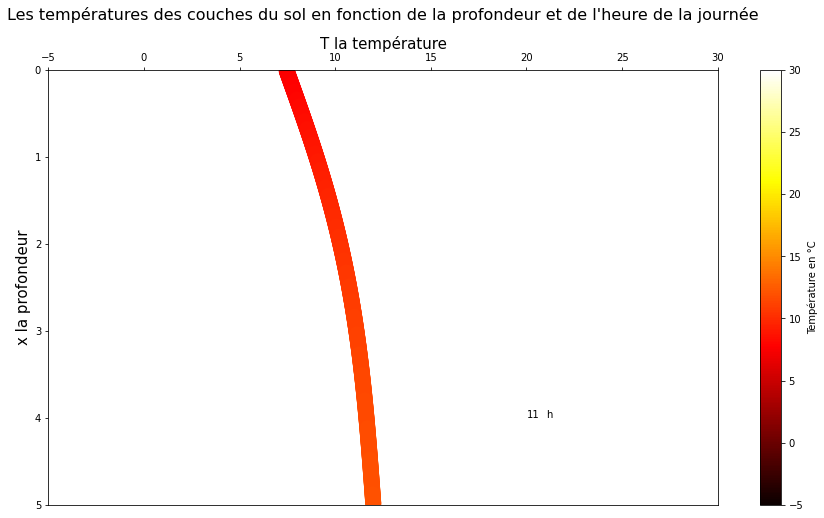

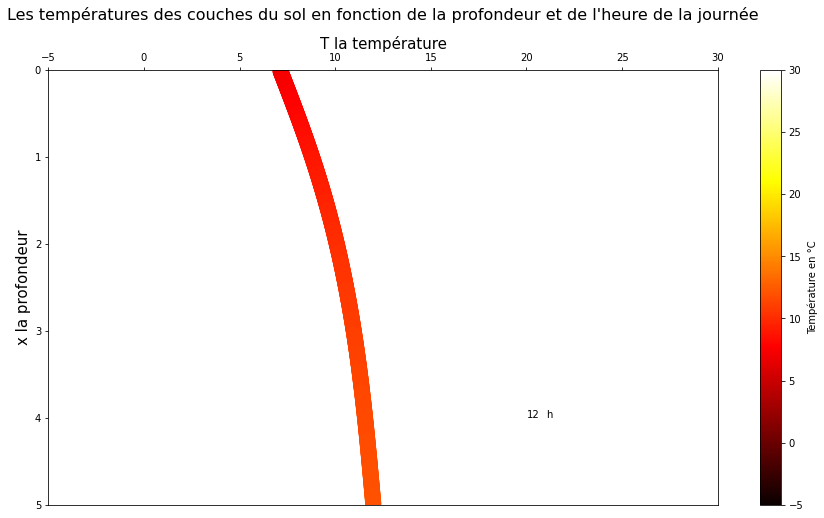

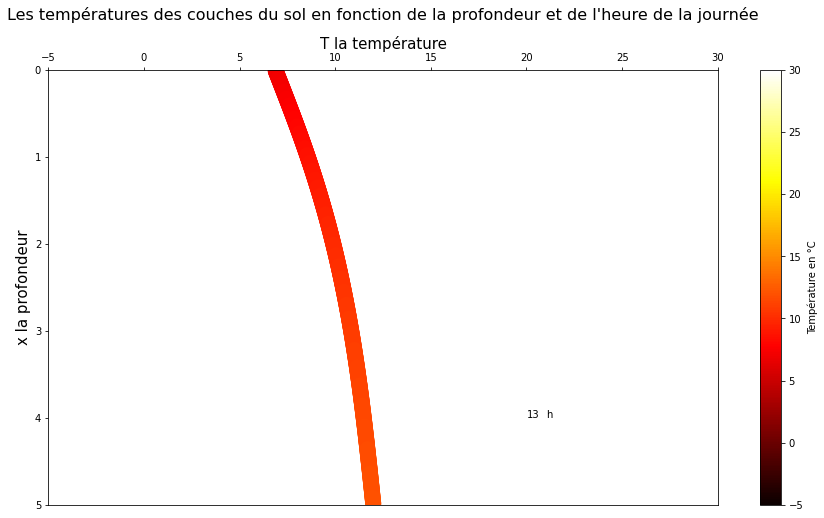

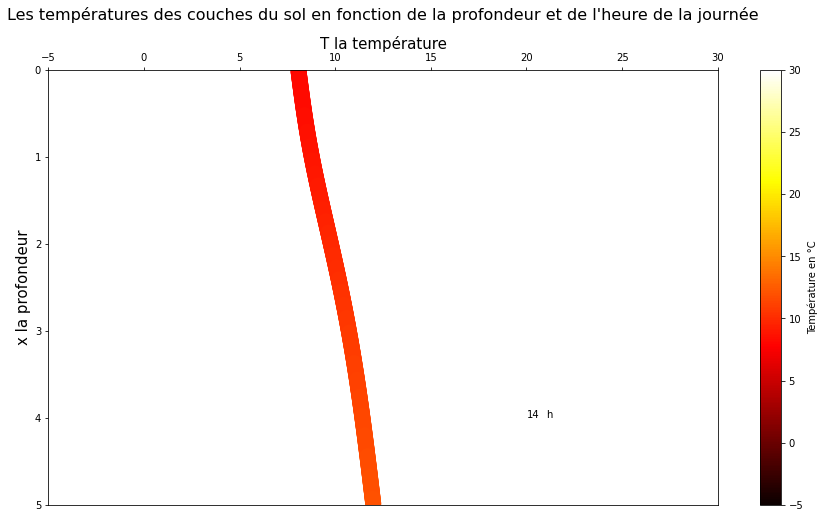

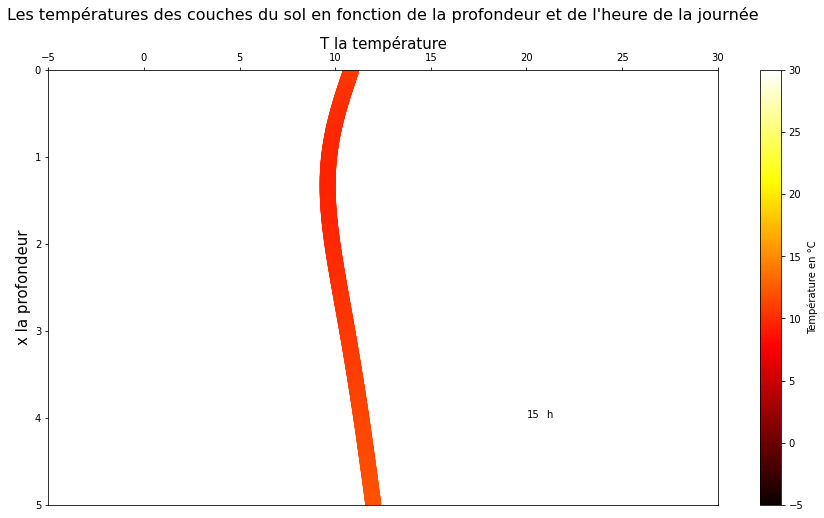

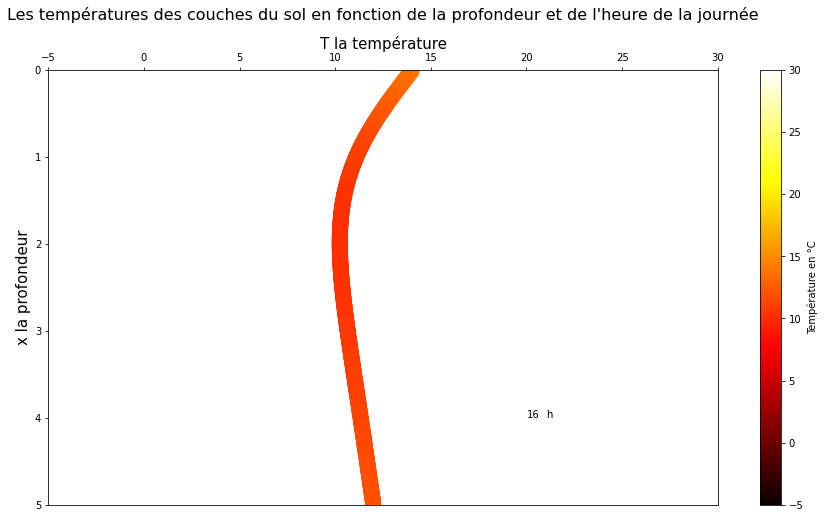

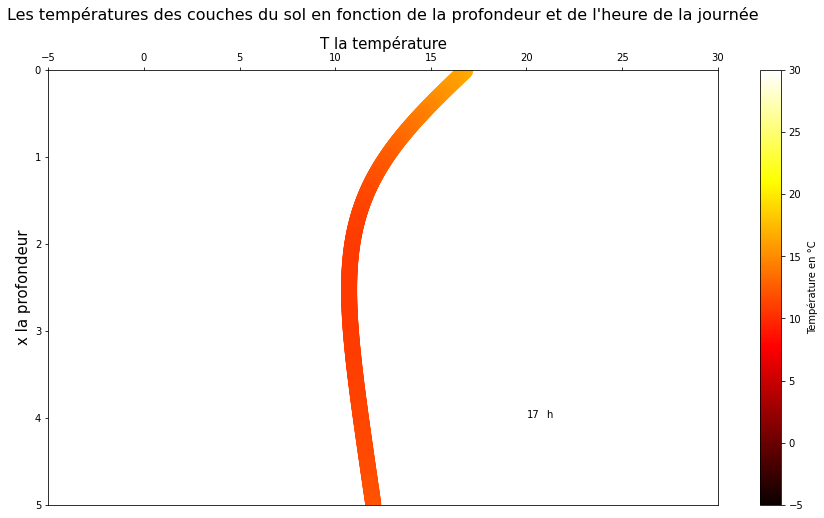

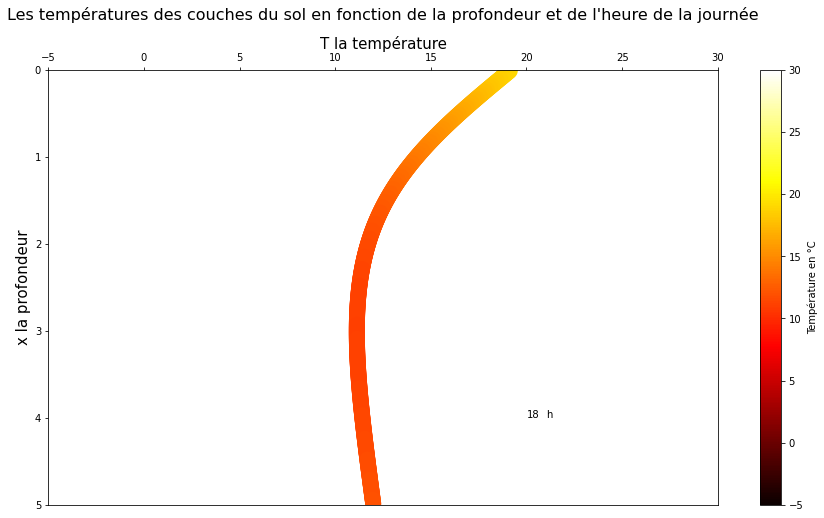

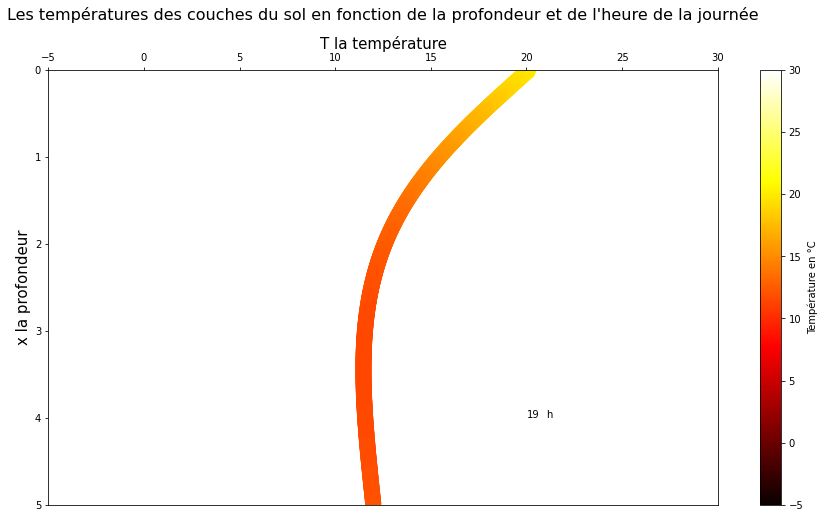

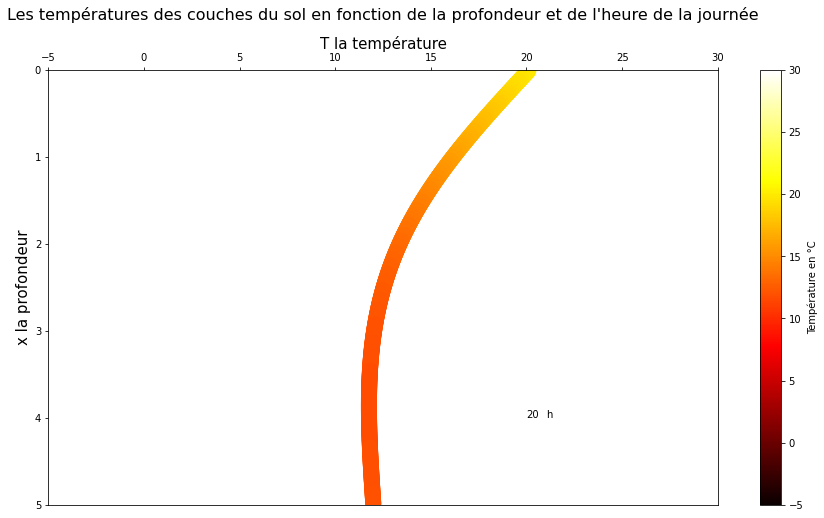

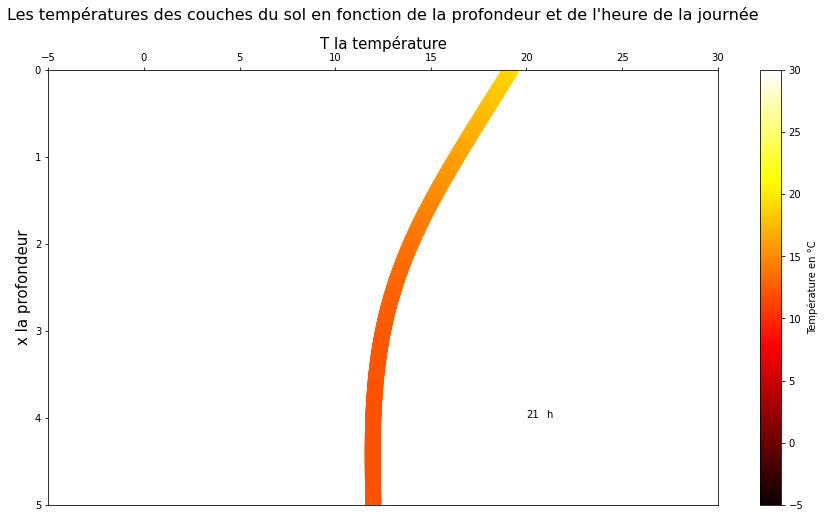

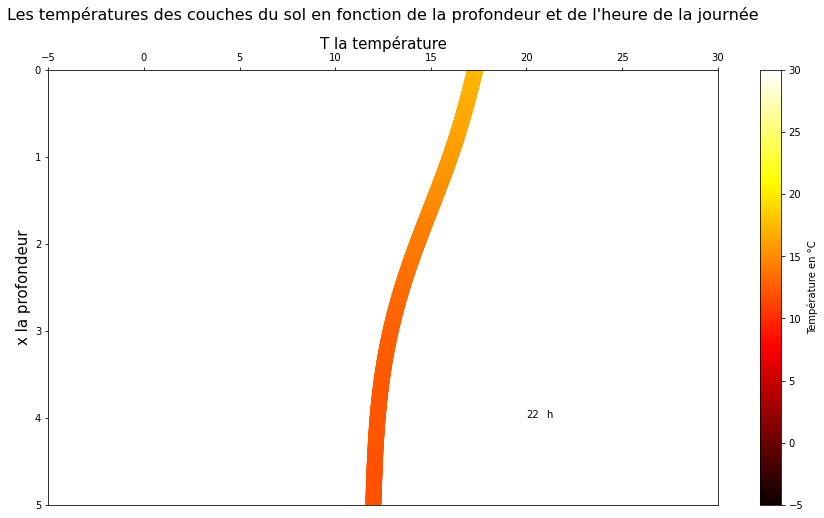

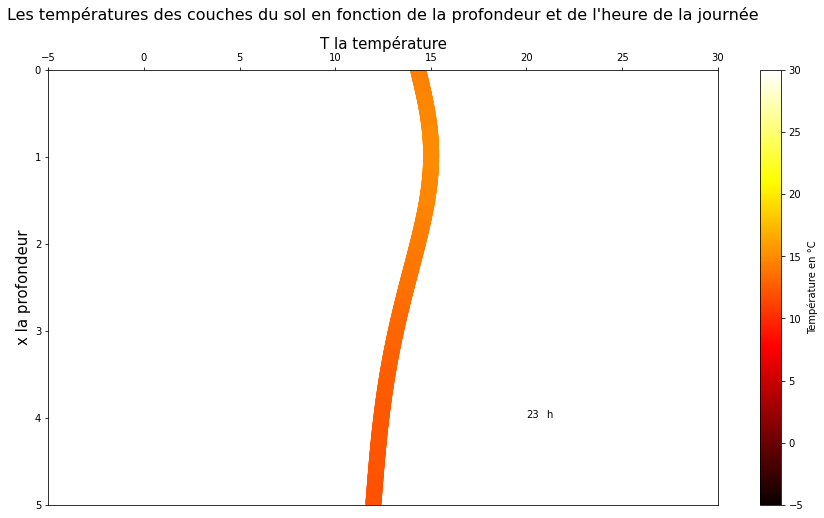

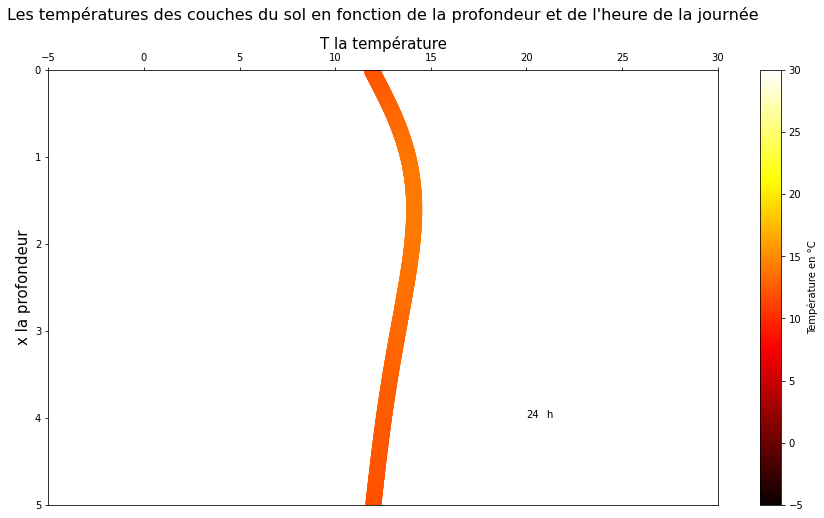

In [91]:
def plot_for_offset(T,profondeur,N,i):
    
    x=intervalle_discret(profondeur,N)
    Y=x[1:-1]
    fig, axes = plt.subplots(figsize=(15,8))
    #axes.plot(T,x[1:-1])
    #axes.grid()
    
    # IMPORTANT ANIMATION CODE HERE
    # Used to keep the limits constant
    axes.set_ylim(0, profondeur)
    #axes.set_xlim(0,20)
    axes.set_xlim(-5,30)
    
    # Paramètres de la courbe
    
    #vmin = 5
    #vmax = 20

    vmin = -5
    vmax = 30
    
    plt.scatter(T, Y, c=T, cmap='hot',vmin=vmin,vmax=vmax,linewidth=10) # ou cmap='hot' 
    # jet_r ou hot_r = couleurs inversées

    plt.text(20,4,i+1)
    plt.text(21,4,'h')


    axes = plt.gca()
    axes.xaxis.set_ticks_position('top')
    axes.yaxis.set_ticks_position('left')
    axes.invert_yaxis()
    axes.xaxis.set_label_position('top')

    plt.xlabel('T la température', fontsize=15)
    plt.ylabel('x la profondeur', fontsize=15)

    #plt.title('Les températures des couches du sol en fonction de la profondeur et de l heure de la journée', fontsize=16)
    #plt.title('''Les températures des couches du sol en fonction de la profondeur et de l'heure de la journée''', fontsize=16)
    plt.title("Les températures des couches du sol en fonction de la profondeur et de l'heure de la journée", fontsize=16, pad=50)

    
    cb = plt.colorbar()
    cb.set_label('Température en °C')

    plt.show()


    # Used to return the plot as an image rray
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image

kwargs_write = {'fps':2, 'quantizer':'nq'}
imageio.mimsave('./heures_avec_titres_test_bis.gif', [plot_for_offset(T[i],profondeur,N,i) for i in range(24)], fps=2)